# Linear Systems and Signal Processing Assignment
## Vishal Vijay Devadiga (CS21BTECH11061)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Question 2

## Question (A)

By the below graphs, it can be seen as $a$:

- Increases, then the width of the distribution decreases and the height increases.
- Decreases, then the width of the distribution increases and the height decreases.

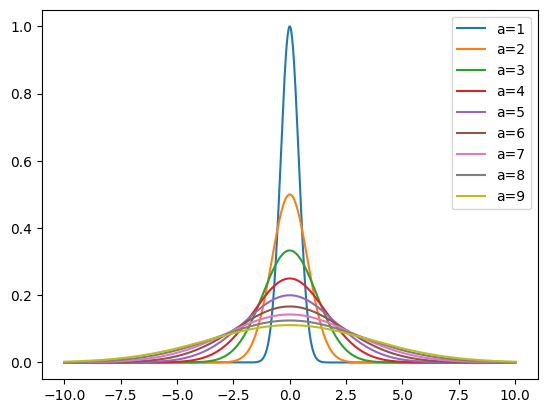

In [2]:
def func(x,a):
    return (1/a)*np.exp(-(np.pi*x*x)/(a*a))

x = np.linspace(-10,10,1000)
arr = np.arange(1,10)
for a in arr:
    plt.plot(x,func(x,a),label='a='+str(a))

plt.legend()
plt.show()

## Question (B)

If $a = 1$, and we take $20$ samples per second then $R_{time} = \frac{1}{20}$

$$ f(t) = e^{-\pi t^2} $$

$$ \mathcal F f(s) = e^{-\pi s^2} $$

Approximate the integral using the sequence $f(nR_{time})$ for $-\infty < n < \infty$

$$ \mathcal Ff(s) \approx \sum_{n=-\infty}^{\infty} f(\frac{n}{R_{time}}) e^{-2 \pi i s n R_{time}} $$

$$ \mathcal Ff(s) \approx \sum_{n=-\infty}^{\infty} f(\frac{n}{20}) e^{- \frac{\pi i s n}{10} } $$

## Question (C)

$w_1(t)$ will limit the signal from $-\frac{L}{2}$ to $\frac{L}{2}$. Thus, summation will go from $-10L$ to $10L$

$$ \mathcal F f(s) = \sum_{n=-10L}^{10L} f(\frac{n}{20}) e^{- \frac{\pi i s n}{10} } $$

## Question (D)

For $s = mR_{freq}$,

$$ \mathcal F f(s) = \sum_{n=-10L}^{10L} f(\frac{n}{20}) e^{- \frac{\pi i mR_{freq} n}{10} } $$

## Question (E)

If:

$$ LR_{freq} = 1 = BR_{time} $$

Then,

$$ R_{time} = \frac{1}{B} $$
$$ R_{freq} = \frac{1}{L} $$

The range of $nR_{time}$ is $[-\frac{L}{2}, \frac{L}{2}]$. Thus,

$$ -\frac{BL}{2} \leq n \leq \frac{BL}{2} $$

The range of $mR_{freq}$ is $[-\frac{L}{2}, \frac{L}{2}]$. Thus,
$$ -\frac{BL}{2} \leq n \leq \frac{BL}{2} $$ 

Number of values in both the domains are $BL$.

Sampling at twice the highest frequency according to **Nyquist Sampling** theorem, we have,

$$ freq_{max} = \frac{B}{2} $$

Only at these sampling rates, the continuous fourier transform and the DFT are can related by discretizing time and frequency.

$$  e^{2\pi ist} \text{ becomes } e^{2\pi imnR_{freq}R_{time}} $$

Substituting $R_{time}=\frac{1}{B}$ and $R_{freq}=\frac{1}{L}$ and $BL = N$:

$$ = e^{\frac{2πimn}{N}}$$
which is the exponent used in DFT.

## Question (F)

Using $a=1$, 20 samples per second

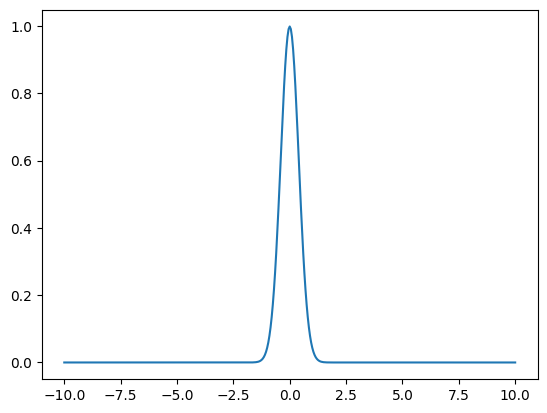

In [3]:
L = 20
B = 20
Rt = 1 / B
Rf = 1 / L

def func(n):
    return np.exp(-np.pi*n*n)

def pl(B,L, f):
    ran = np.arange(-L/2,(L/2)+(1/B),(1/B))
    s=np.arange(-B/2,B/2+(1/L),(1/L))
    y=np.fft.fftshift(np.absolute(np.fft.fft(f(ran)))/np.sqrt(len(f(ran))))
    return s,y

s,y = pl(B,L, func)
plt.plot(s,y)

## Question (G)

Since, the ideal condition is:

$$ LR_{freq} = BR_{time} = 1 $$

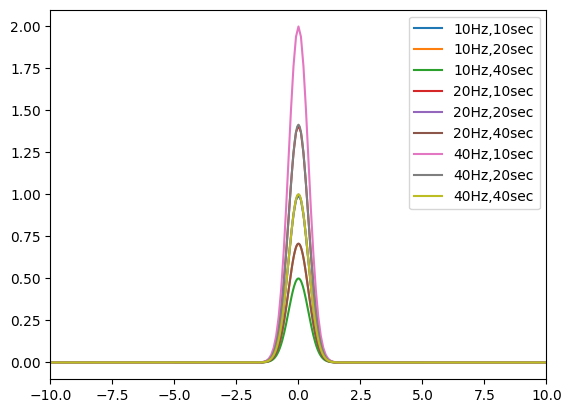

In [4]:
for B in [10,20,40]:
    for L in [10,20,40]:
        s,y = pl(B,L, func)
        plt.plot(s,y,label=str(B)+'Hz,'+str(L)+'sec')

plt.legend()
plt.xlim(-10,10)
plt.show()

The function is smoother with more samples per unit bandwidth, which is why in the above graph $10 Hz, 40 sec$ graph is the smoothest.

Also,

$$ Amplitude \propto \frac{B}{L} $$

## Question (H)

For:

$$ w_2(t) = \begin{cases}
1 - \frac{2|t|}{L} \text{ for } |t| < \frac{L}{2}
\\ 0 \text{ elsewhere } 
\end{cases} $$

and 

$$ w_3(t) = \begin{cases}
\sin^2 \frac{2 \pi t}{L} \text { for } |t| < \frac{L}{2}
\\ 0 \text { elsewhere }
\end{cases} $$

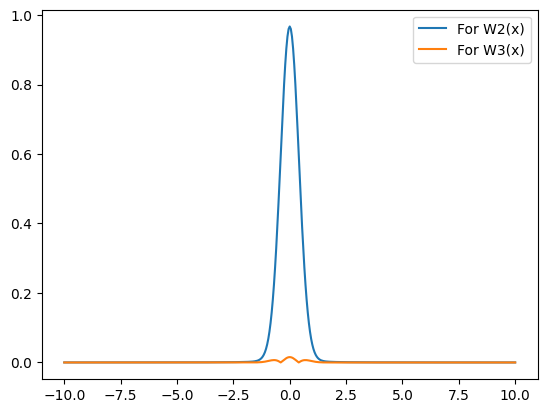

In [5]:
B = 20
L = 20

def w2(x):
    if np.abs(x) <= L/2:
        return 1 - 2*np.abs(x)/L
    else:
        return 0
    
def w3(x):
    if np.abs(x)<=L/2:
        return np.sin(2*np.pi*x/L)**2
    else:
        return 0

ran = np.arange(-L/2,L/2+(1/B),1/B)
s = np.arange(-B/2,B/2+(1/L),(1/L))

filt=np.zeros((len(s)))
ffilt=np.zeros((len(s)))

for i in range(0, B*L + 1):
    filt[i]=w2(-L/2+(i/B))

ffilt=np.multiply(filt,func(ran))

y=np.fft.fftshift(np.absolute(np.fft.fft(ffilt))/np.sqrt(len(ffilt)))

plt.plot(s,y, label='For W2(x)')

for i in range(0, B*L + 1):
    filt[i]=w3(-L/2+(i/B))

ffilt=np.multiply(filt,func(ran))

y=np.fft.fftshift(np.absolute(np.fft.fft(ffilt))/np.sqrt(len(ffilt)))

plt.plot(s,y, label='For W3(x)')
plt.legend()

## Question (I)

For:

$$ g(t) = cos (2 \pi t) + 0.5 sin (4 \pi t)$$

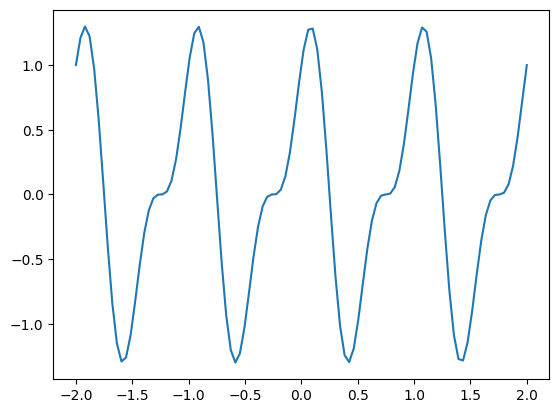

In [6]:
def func2(x):
    return np.cos(2*np.pi*x) + 0.5*np.sin(4*np.pi*x)

x = np.linspace(-2,2,100)

plt.plot(x,func2(x))

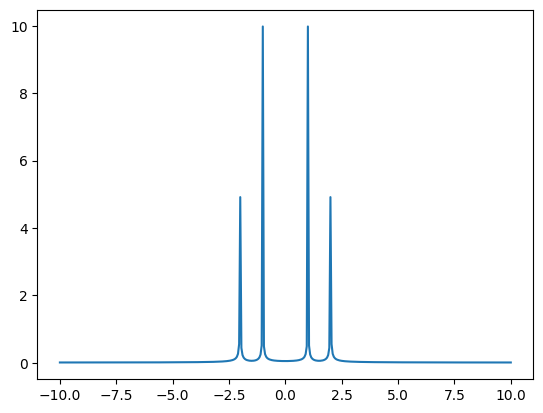

In [7]:
# DFT

L = 20
B = 20
Rtime=1/B
Rfreq=1/L

s,y = pl(B,L, func2)
plt.plot(s,y)

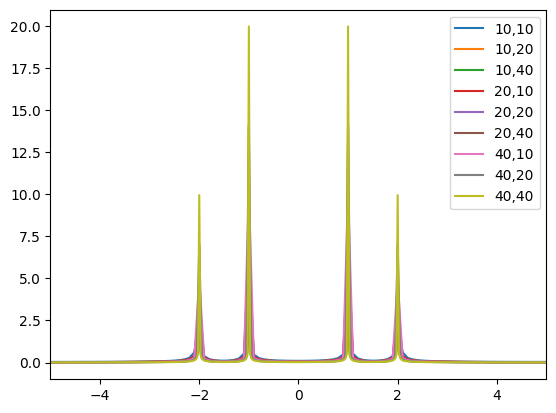

In [8]:
for B in [10,20,40]:
  for L in [10,20,40]:
    s,y = pl(B,L, func2)
    plt.plot(s,y,label=str(B)+','+str(L))

plt.legend()
plt.xlim(-5,5)
plt.show()

(-3.0, 3.0)

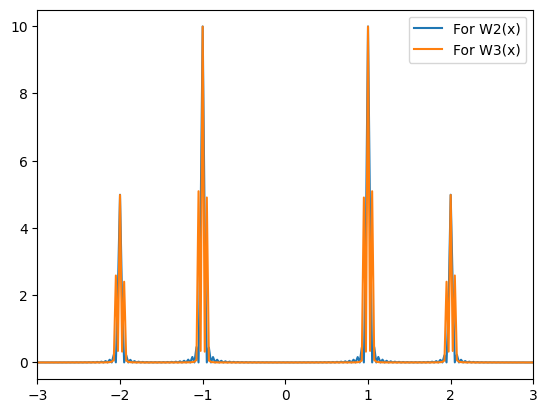

In [9]:
ran = np.arange(-L/2,L/2+(1/B),1/B)
s = np.arange(-B/2,B/2+(1/L),(1/L))

filt=np.zeros((len(s)))
ffilt=np.zeros((len(s)))

for i in range(0,B*L+1):
    filt[i]=w2(-L/2+(i/B))

ffilt=np.multiply(filt,func2(ran))

y=np.fft.fftshift(np.absolute(np.fft.fft(ffilt))/np.sqrt(len(ffilt)))

plt.plot(s,y, label='For W2(x)')
plt.legend()

for i in range(0,B*L+1):
    filt[i]=w3(-L/2+(i/B))

ffilt=np.multiply(filt,func2(ran))

y=np.fft.fftshift(np.absolute(np.fft.fft(ffilt))/np.sqrt(len(ffilt)))

plt.plot(s,y, label='For W3(x)')
plt.legend()

plt.xlim(-3,3)

# Question 3

Let frame rate of camera be $R_1$ and frame rate of rotor be $R_2$.

## Question (A)

The helicopter is flying, yet the rotor is not turning. This is because the number of rotations of rotor per second per blade is an integral multiple of the frame rate of the camera. So, the rotor appears to be stationary.

$$ nR_1 = \dfrac{R_2}{N}$$ 
where $n$ is a integer and $N$ is the number of blades in the rotor.

## Question (B)

For 
$nR_1 = \dfrac{R_2}{5}$ where $n$ is an integer if the rotor has 5 blades.

Thus,

$$R_2 = 5nR_1$$

## Question (C)

The assumption that the rotor has 5 blades is valid, because it is a frame shot.

Suppose, we had seen 6 blades then, the rotor would have 6 blades. due to the same reason.

$$ nR_1 = \dfrac{R_2}{6} $$

# Question 4

## Question (A):

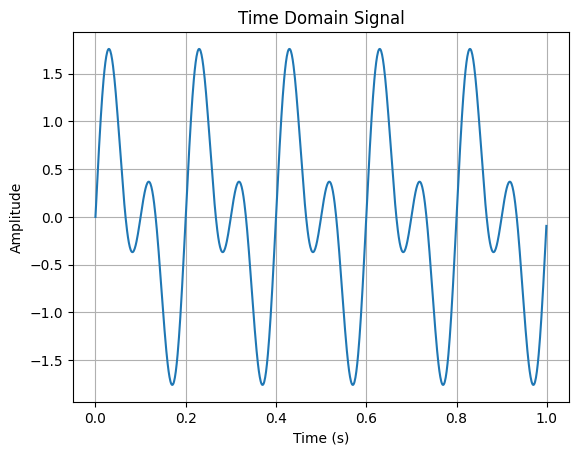

In [10]:
# Generate a sinusoidal waveform with two frequency components, say 5 Hz and 10 Hz. 
# The sampling rate must be chosen to properly produce the waveform without aliasing. 
# Any rate above 20 Hz will suffice. 
# Produce a one second plot of the waveform.

# Parameters
dur = 1  # 1 second
samp_rate = 1000 # 1000 samples per second

# Time axis
t = np.linspace(0, dur, int(samp_rate * dur), endpoint=False)

# Generate the sinusoidal waveform components
freq_1 = 5  # 5 Hz
freq_2 = 10  # 10 Hz

wave_1 = np.sin(2 * np.pi * freq_1 * t)
wave_2 = np.sin(2 * np.pi * freq_2 * t)
# wave_2 = 0

# Combine the two components to get the final waveform
wave_f = wave_1 + wave_2

# Perform FFT
res_fft = np.fft.fft(wave_f)


# Plot the FFT result
plt.plot(t, wave_f)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.savefig('4.1.png')


## Question (B):

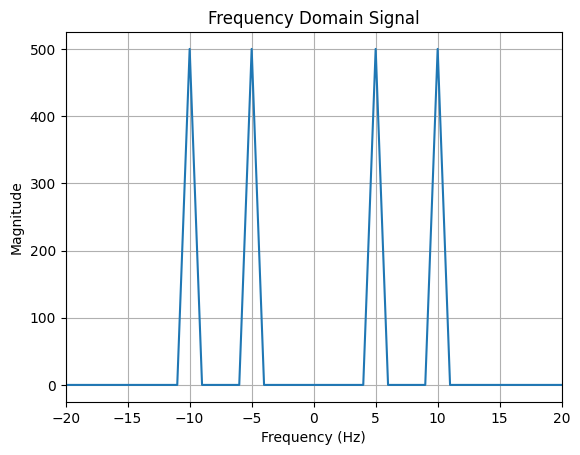

In [11]:
# We next will find the frequency spectrum of the signal from part a. 
# To do so, first use the Fast Fourier Transform function (numpy.fft) to compute the DFT and bring the signal into the frequency domain. 
# Use the fftshift function (numpy.fft.fftshift) to produce a plot that will zero centre the signal.

res_fftfreqs = np.fft.fftfreq(len(wave_f), 1/samp_rate)

# Shift the FFT result to center the frequencies
res_fft_shifted = np.fft.fftshift(res_fft)
res_fftfreqs_shifted = np.fft.fftshift(res_fftfreqs)

# Plot the FFT result (Frequency Domain)
plt.plot(res_fftfreqs_shifted, np.abs(res_fft_shifted))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)

plt.savefig('4.2.png')

## Question (C):

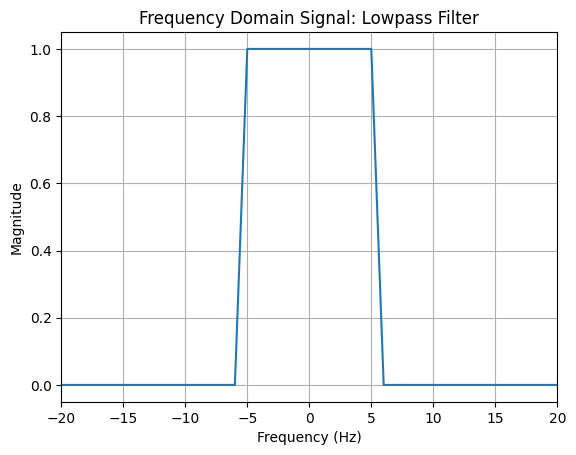

In [12]:
# Now, create a lowpass filter to recover the 5 Hz component of the signal. 
# Produce a plot of the filter and the filtered signal in the frequency domain.

# Create a lowpass filter
cutoff_freq = 5
filter_res = np.zeros_like(res_fftfreqs)
filter_res[np.abs(res_fftfreqs) <= cutoff_freq] = 1
filter_res_shifted = np.fft.fftshift(filter_res)

# Plot the FFT result (Frequency Domain)
plt.plot(res_fftfreqs_shifted, np.abs(filter_res_shifted))
plt.title('Frequency Domain Signal: Lowpass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)

plt.savefig('4.3-1.png')

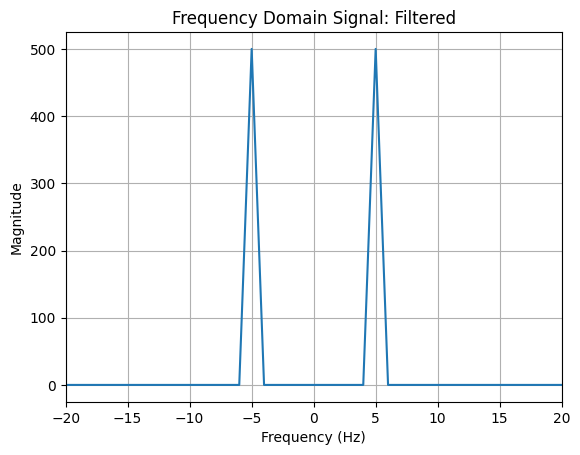

In [13]:
# Apply the filter to the FFT result
sig_fft_filtered = np.fft.fftshift(res_fft * filter_res)

# Plot the FFT result (Frequency Domain)
plt.plot(res_fftfreqs_shifted, np.abs(sig_fft_filtered))
plt.title('Frequency Domain Signal: Filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)

plt.savefig('4.3-2.png')


## Question (D):

/home/sterben/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sterben/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


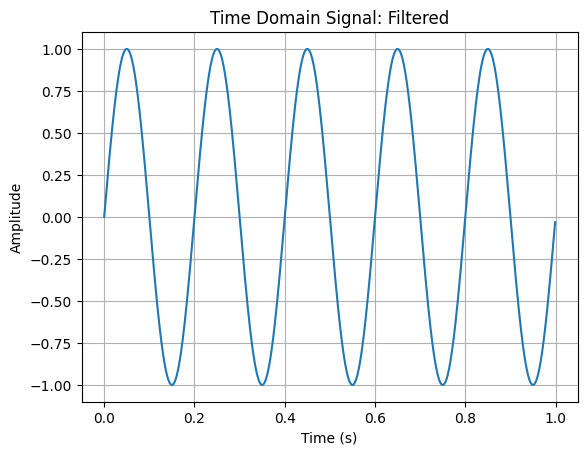

In [14]:
# With the filtered signal, take the Inverse Discrete Fourier Transform (via numpy.ifft) to bring the signal back into the time domain. 
# Produce a plot with one second of the signal to show that the 5 Hz signal was recovered. 

# Perform Inverse FFT
sig_filtered = np.fft.ifft(np.fft.ifftshift(sig_fft_filtered))

# Plot the IFFT result
plt.plot(t, sig_filtered)
plt.title('Time Domain Signal: Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.savefig('4.4.png')

# Question 5

Note for running code:
> For the wav file, keep it in a folder named `audio`, or change the variable `filepath` in the code. 
> For the generated files, it gets generated in a folder called `output` inside the `audio` folder. If needed change the variable called `genfilepath`

Here is the code for the question:

In [15]:
# filepath = './audio/CantinaBand3.wav'
filepath = './audio/StarWars3.wav'
# Read a wav file and obtain the original sampling rate
ori_rate, ori_data = wavfile.read(filepath)

## Changing Sampling Rate

In [16]:
def change_sampling_rate(ori_data, ori_rate, new_rate):
    resample_ratio = new_rate / ori_rate
    
    points = int(len(ori_data) * resample_ratio)
    resampled_data = np.zeros(points)
    for i in range(points):
        pos = i / resample_ratio
        lsi = int(pos)
        rsi = lsi+1
        fp = pos - lsi
        
        if rsi < len(ori_data):
            ls = ori_data[lsi]
            rs = ori_data[rsi]
            inters = int((1-fp)*ls + fp*rs)
            resampled_data[i] = inters

    return resampled_data

## Quantization

In [17]:
def quantize(data, bits):
    quant_step = 2 / (2**bits - 1)
    quantized_data = np.round(data/ quant_step)*quant_step
    return quantized_data

## Writing the audio files and graphing them

Here, all the audio files are written to the audio folder, and output subfolder.

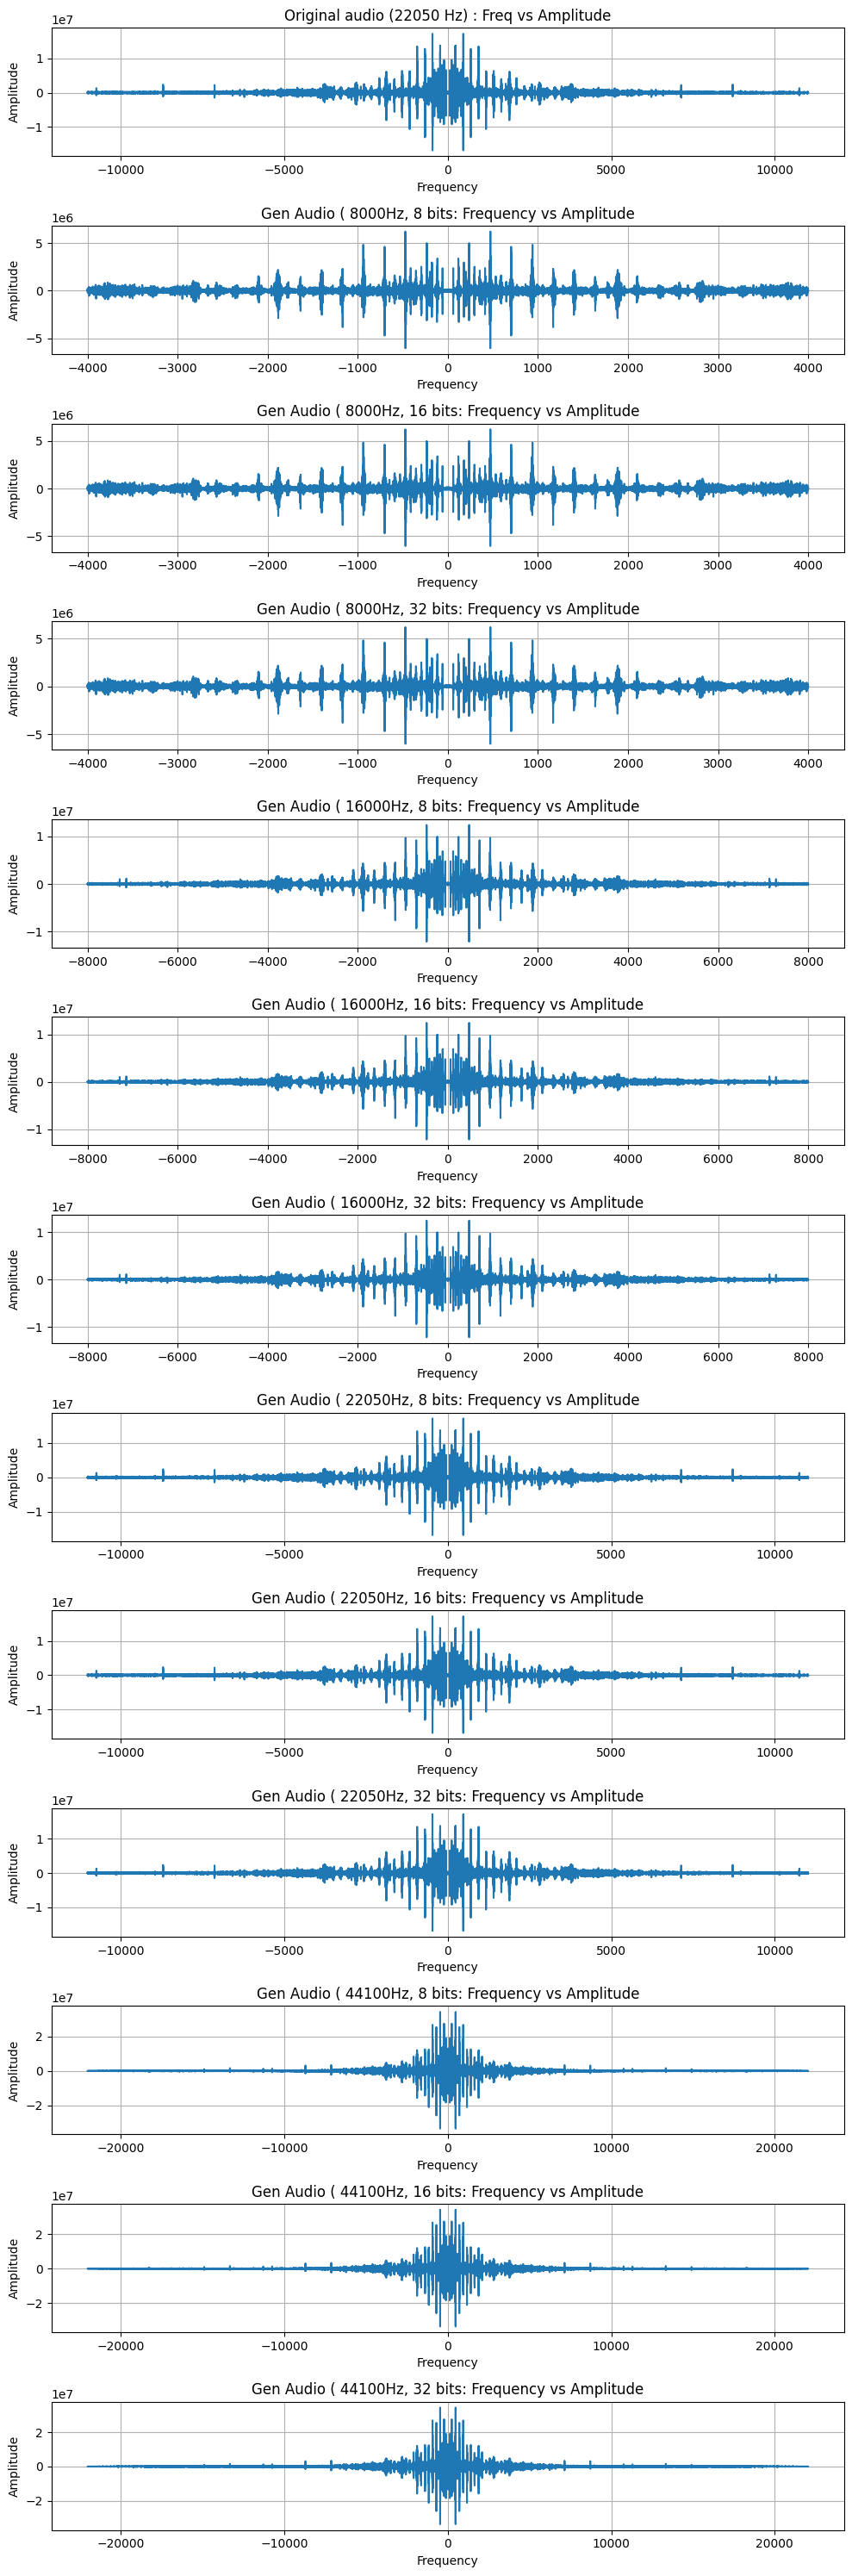

In [18]:
sampling_rates = [8000, 16000, 22050, 44100] # Different sampling rates to test, for example
quantization_bits = [8, 16, 32] # Different quantization levels to test

x = len(sampling_rates)
y = len(quantization_bits)

# Make 13 subplots
fig, axes = plt.subplots(1+x*y, figsize=(10, 30))

# Plot the quantized audio
res_fft = np.fft.fft(ori_data)
res_fft_freq = np.fft.fftfreq(len(ori_data), 1.0/ori_rate)

axes[0].plot(res_fft_freq, res_fft)
axes[0].set_title('Original audio' + ' (' + str(ori_rate) + ' Hz) : Freq vs Amplitude')
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)


for i in range(x):
    for j in range(y):
        rate = sampling_rates[i]
        bits = quantization_bits[j]
        
        # Change sampling rate
        new_data = change_sampling_rate(ori_data, ori_rate, rate)
        # Quantize the audio data
        quantized_data = quantize(new_data, bits)
        
        # Save the quantized audio
        output_file = 'audio_' + str(rate) + '_' + str(bits) + '.wav' 
        output_filename = 'audio/output/' + output_file
        
        wavfile.write(output_filename, rate, quantized_data)
        
        res_fft = np.fft.fft(quantized_data)
        # res_fft_shifted = np.fft.fftshift(res_fft)
        
        res_fft_freq = np.fft.fftfreq(len(quantized_data), 1.0/rate)
        
        # Plot the quantized audio
        axes[1+i*y+j].plot(res_fft_freq, res_fft)
        title = 'Gen Audio ( ' + str(rate)+'Hz, '+ str(bits) +' bits: Frequency vs Amplitude'
        axes[1+i*y+j].set_title(title)
        axes[1+i*y+j].set_xlabel("Frequency")
        axes[1+i*y+j].set_ylabel("Amplitude")
        axes[1+i*y+j].grid(True) 
     
plt.tight_layout()
plt.savefig('audio/graph.png')

As we see above, the original audio signals differs a bit from the generated signals. 

This is because of: 

- **Quantization Error**: The quantization error is the difference between the original signal and the quantized signal. The quantization error is due to the fact that the quantizer is not able to represent the signal exactly. More the number of bits, lesser the quantization error. It is occuring in all signals, but is more prominent in the 8 bit signal
- **Sampling Error**: Changing the sampling rate of a signal can cause distortion of the signal, known as aliasing, as seen in the sampling theory. It is occuring in the 8000 Hz signal and 16000Hz signal in my case. Also, lower the sampling rate, the more muffled the audio sounds.